In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
tweets_df = pd.read_csv(r'E:\SentimentAnalysis\TwitterDataSet\dataset.csv')
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [52]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [53]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [54]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [55]:
tweets_df.drop('id', axis=1, inplace=True)
tweets_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

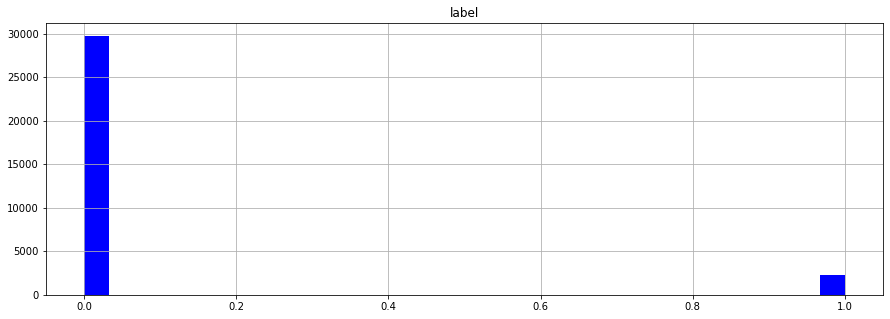

In [56]:
tweets_df.hist(bins=30, figsize=(15,5), color='b')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

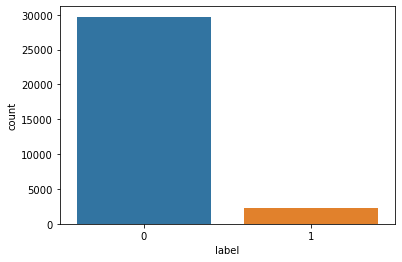

In [57]:
sns.countplot(tweets_df['label'], label='count')

In [58]:
tweets_df['length'] = tweets_df['tweet'].apply(len)
tweets_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


<AxesSubplot:ylabel='Frequency'>

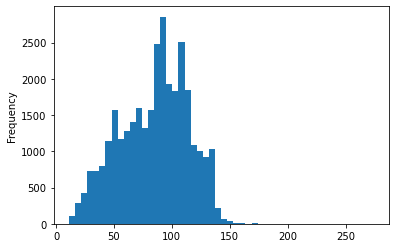

In [59]:
tweets_df['length'].plot(bins=50, kind='hist')

In [60]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [61]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [62]:
sentences = tweets_df['tweet'].to_list()
sentences[:10]

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! "]

In [63]:
len(sentences)

31962

In [64]:
single_sentence = ' '.join(sentences)
single_sentence[:500]

" @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user c"

In [65]:
!pip install WordCloud
from wordcloud import WordCloud

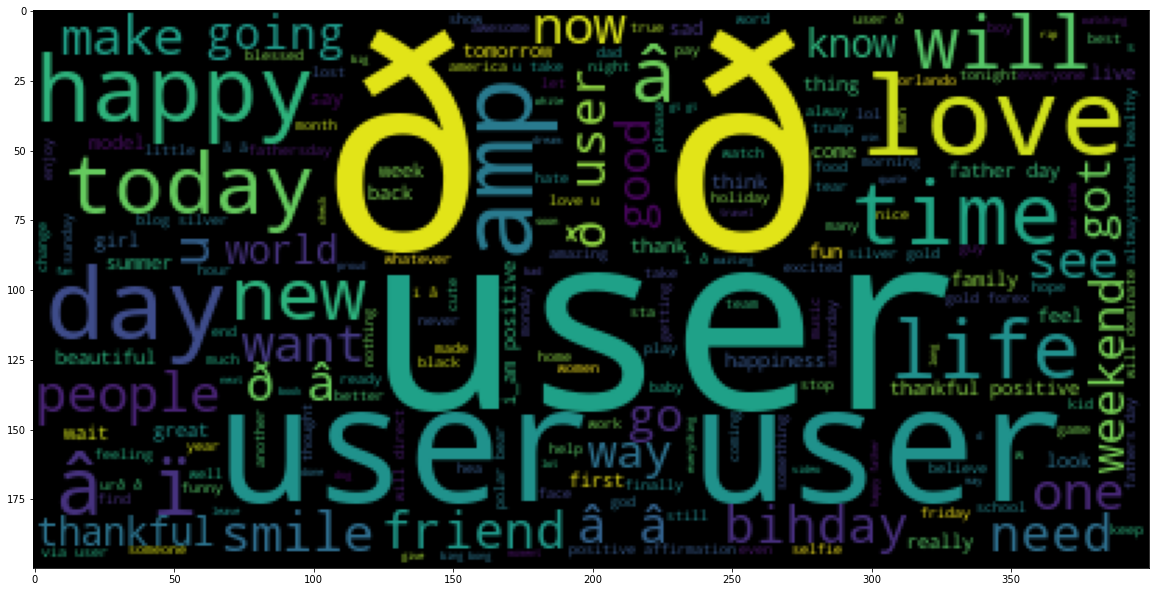

In [66]:

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_sentence))

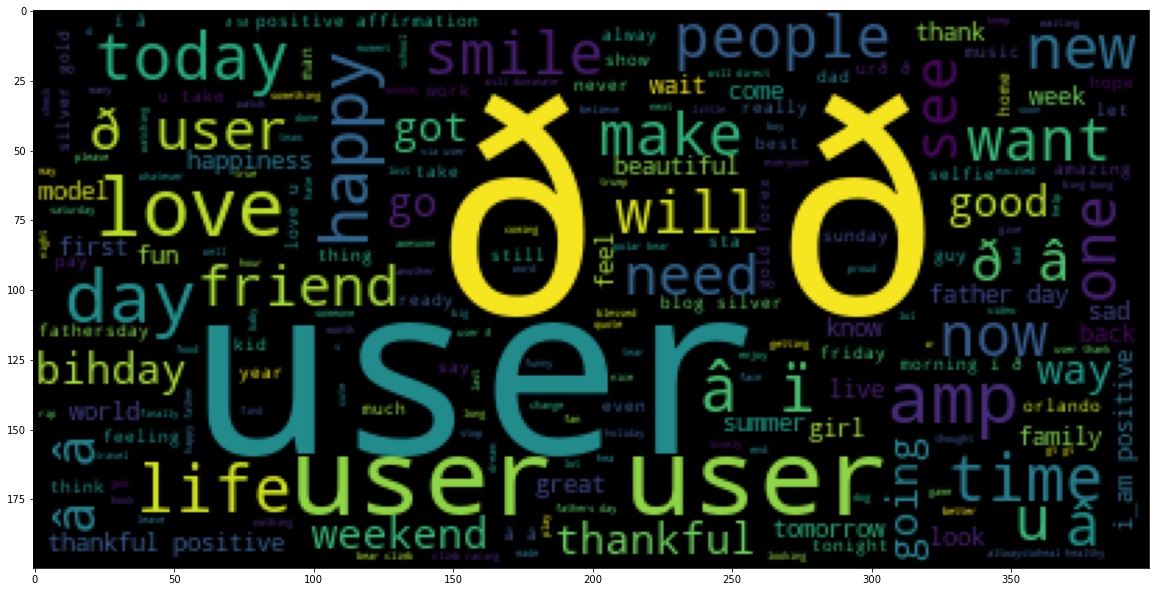

In [67]:
positive_sentences = positive['tweet'].to_list()
single_positive = ' '.join(positive_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_positive))

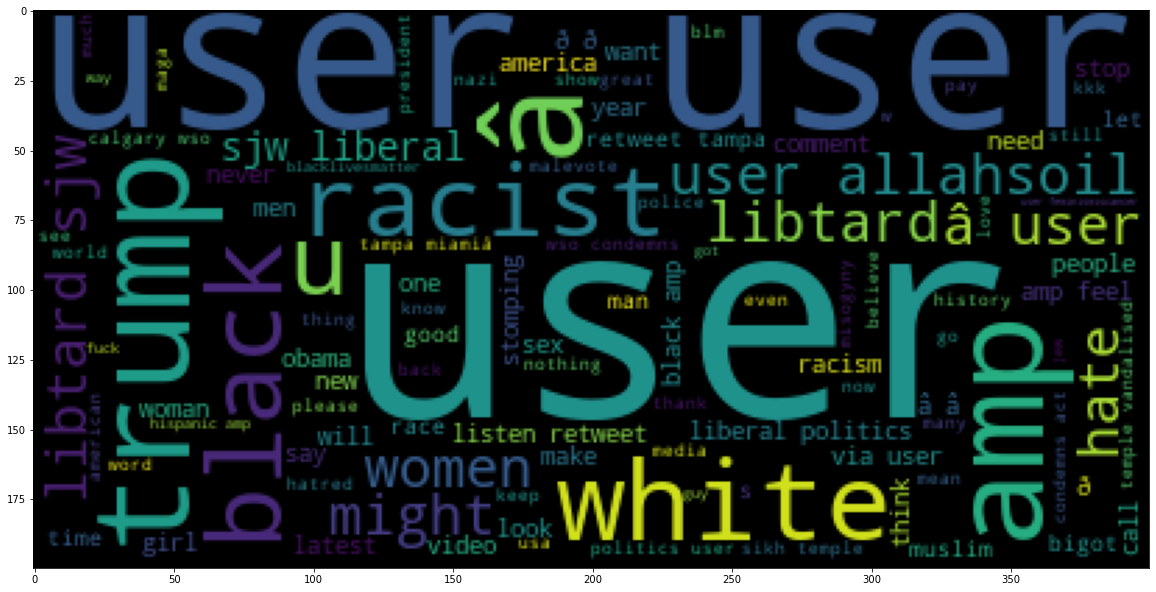

In [68]:
negative_sentences = negative['tweet'].to_list()
single_negative = ' '.join(negative_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_negative))

In [69]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [71]:
test_punc_remove = ''.join([c for c in Test if c not in string.punctuation])
test_punc_remove

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [72]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shwet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [74]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [75]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shwet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [77]:
test_punc_clean = [word for word in test_punc_remove.split() if word.lower() not in stopwords.words('english')]
test_punc_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

In [78]:
def message_cleaning(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punc_removed_join_clean

In [79]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [80]:
print(tweets_df_clean[5]) 
print(tweets_df['tweet'][5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet']).toarray()

In [82]:
vectorizer.get_feature_names()[:10]

['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019']

In [83]:
tweets_countvectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [84]:
tweets_countvectorizer.shape

(31962, 47386)

In [85]:
X = tweets_countvectorizer
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [86]:
X.shape

(31962, 47386)

In [87]:
y = tweets_df['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [88]:
y.shape

(31962,)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [93]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

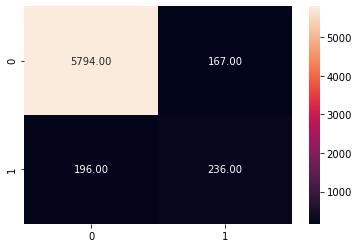

In [94]:
np.set_printoptions(precision=3)
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='.2f')

In [95]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5961
           1       0.59      0.55      0.57       432

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393



In [96]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_predict_test)
print("Accuracy: {:.4%}".format(accuracy))
      

Accuracy: 94.3219%
